In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#needed to import qke procedures
import sys
from pathlib import Path

main_dir = str(Path().resolve().parent)
sys.path.insert(1, main_dir)

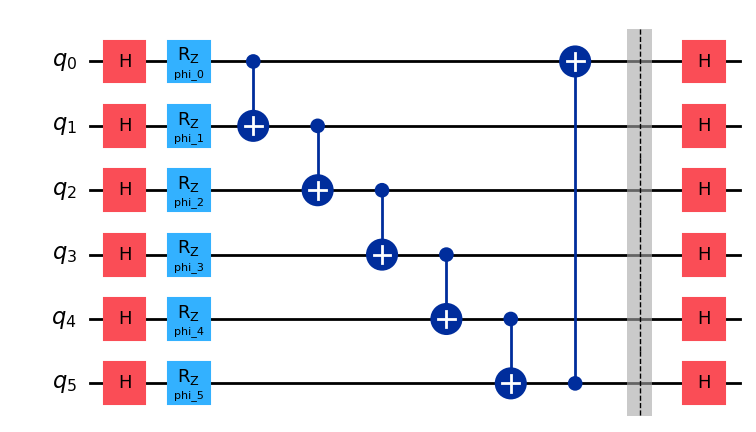

In [20]:
from qke.qproc import Circuits

q_template = Circuits.circularEnt(6)
q_template.draw('mpl')

In [23]:
#load dataset with panda
#data are scaled outside the notebook
import pandas as pd

env = pd.read_csv('../data/env.sel3.scaled.csv')  
X = env[['illuminance', 'blinds','lamps','rh', 'co2', 'temp']]

In [29]:
X_value = X.values[0]
print(X_value)


[-0.99277374  1.          0.          0.40689999 -1.00177691 -0.06102718]


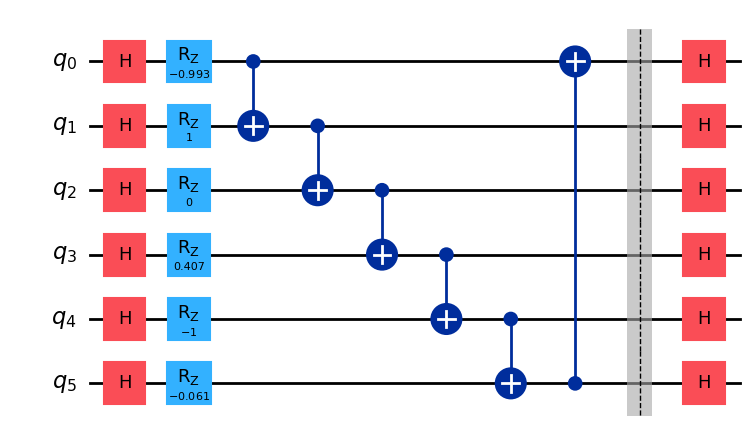

In [32]:
from qke.qproc import qEncoding

my_q_assigned = qEncoding(q_template, X_value)
my_q_assigned.draw('mpl')

In [33]:
from qke.qproc import evalObsAer
from qke.qproc import evalObsPrimitive
from qke.qproc import evalObsStateVector

#try evaluatin function
a = evalObsAer(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
b = evalObsPrimitive(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
c = evalObsStateVector(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

In [34]:
print(type(a))
print(a)
print(b)
print(c)

<class 'numpy.ndarray'>
[0.2946548  0.5378032  0.49481384 0.91835211 0.54030231 0.29520434]
[0.37613468 0.57886693 0.45834998 0.85552523 0.59096021 0.32898751]
[0.2946548  0.5378032  0.49481384 0.91835211 0.54030231 0.29520434]


In [11]:
q_template_polar = Circuits.encodingY(6)

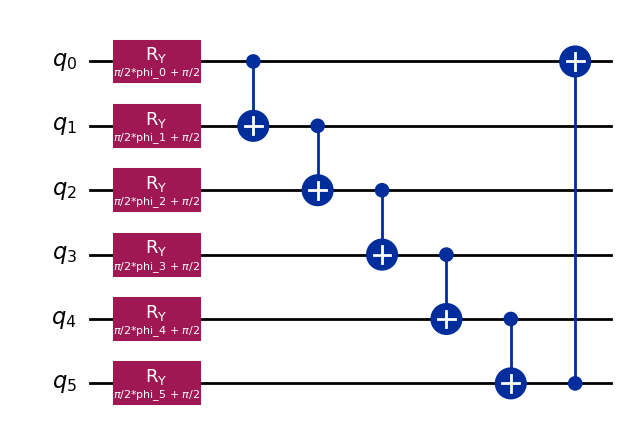

In [12]:
q_template_polar.draw('mpl')

In [35]:
my_q_assigned_p = qEncoding(q_template_polar,X_value)

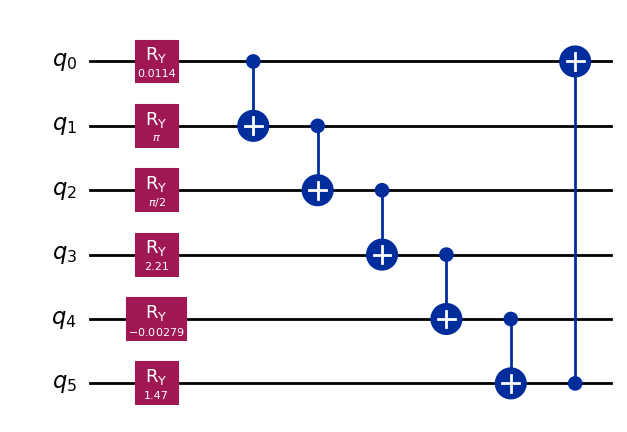

In [36]:
my_q_assigned_p.draw('mpl')

In [37]:
a_ = evalObsAer(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
#b_ = evalObsPrimitive(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
c_ = evalObsStateVector(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

In [43]:
print(a_)
#print(b_)
print(c_)

[-4.85722573e-17  6.93889390e-18  6.93889390e-18 -7.63278329e-17
 -9.99935578e-01  2.08166817e-17]
[-5.55111512e-17  1.11022302e-16  0.00000000e+00 -5.55111512e-17
 -9.99935578e-01 -5.55111512e-17]
